In [85]:
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

### Overview

In [86]:
df = pd.read_csv('./data/insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [87]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Cleaning

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


We need to change the object type columns to integer.

In [89]:
df["sex"] = df["sex"].map({"male": 1, "female": 0})
df["smoker"] = df["smoker"].map({"yes": 1, "no": 0})
df["region"] = df["region"].map({"southeast": 0, "southwest": 1, "northwest": 2, "northeast": 3})
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [90]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int64  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int64  
 5   region    1338 non-null   int64  
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(5)
memory usage: 73.3 KB


Let's check for null values.

In [91]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Creating test set

In [92]:
from sklearn.model_selection import train_test_split

train_set, test_set = train_test_split(df, test_size=0.2, random_state=RANDOM_SEED)
df = train_set

test_set.to_csv('./data/test.csv', index=False)

# Analyzing dataset

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

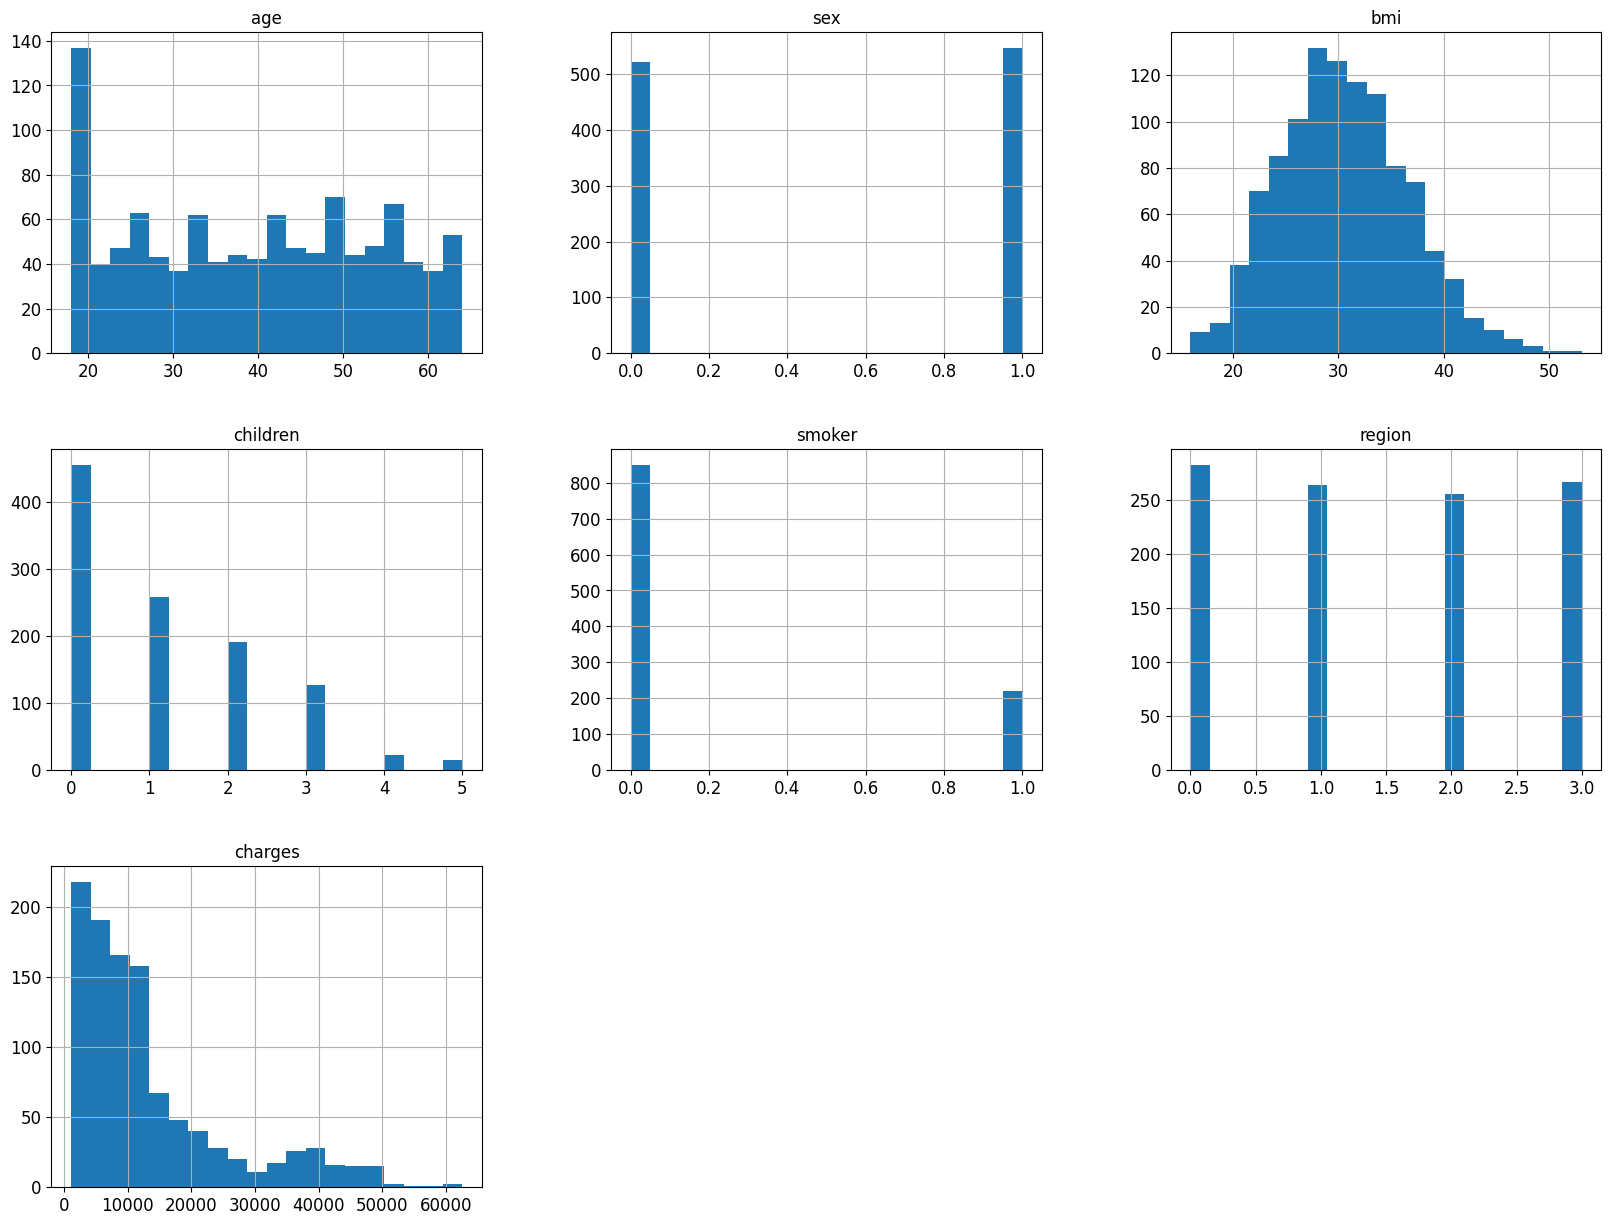

In [93]:
df.hist(bins=20, figsize=(20,15))

There are more data with lower charges than with higher ones. We can try to apply a logarithmic scale.

<Axes: >

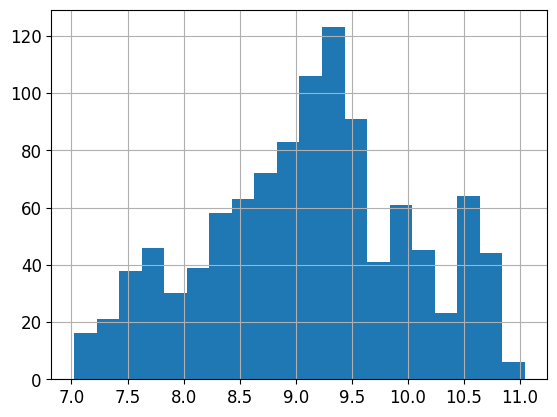

In [94]:
df_log = df.copy()
df_log["charges"] = np.log(df["charges"])
df_log["charges"].hist(bins=20)

<Axes: >

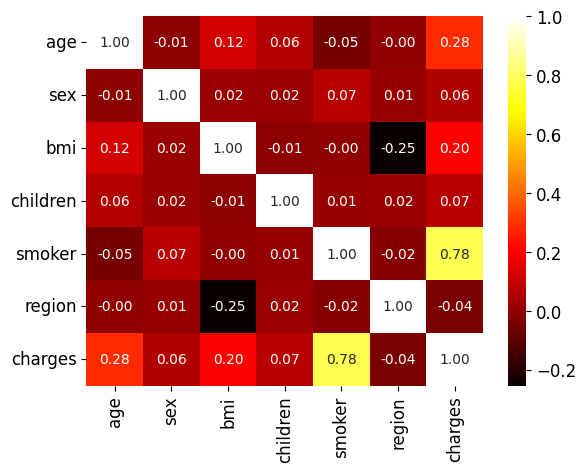

In [95]:
sns.heatmap(df.corr(), cmap='hot', annot=True, fmt=".2f")

Smokers are not correlated with any of the other parameters except for the charges so we can safely apply oversampling to have as many smokers as non-smokers

In [96]:
smokers = df[df["smoker"] == 1]
df_smokers = df.copy()
while df_smokers["smoker"].mean() < 0.5:
    df_smokers = pd.concat([df_smokers, smokers], ignore_index=True)

df_smokers.shape

(1730, 7)

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

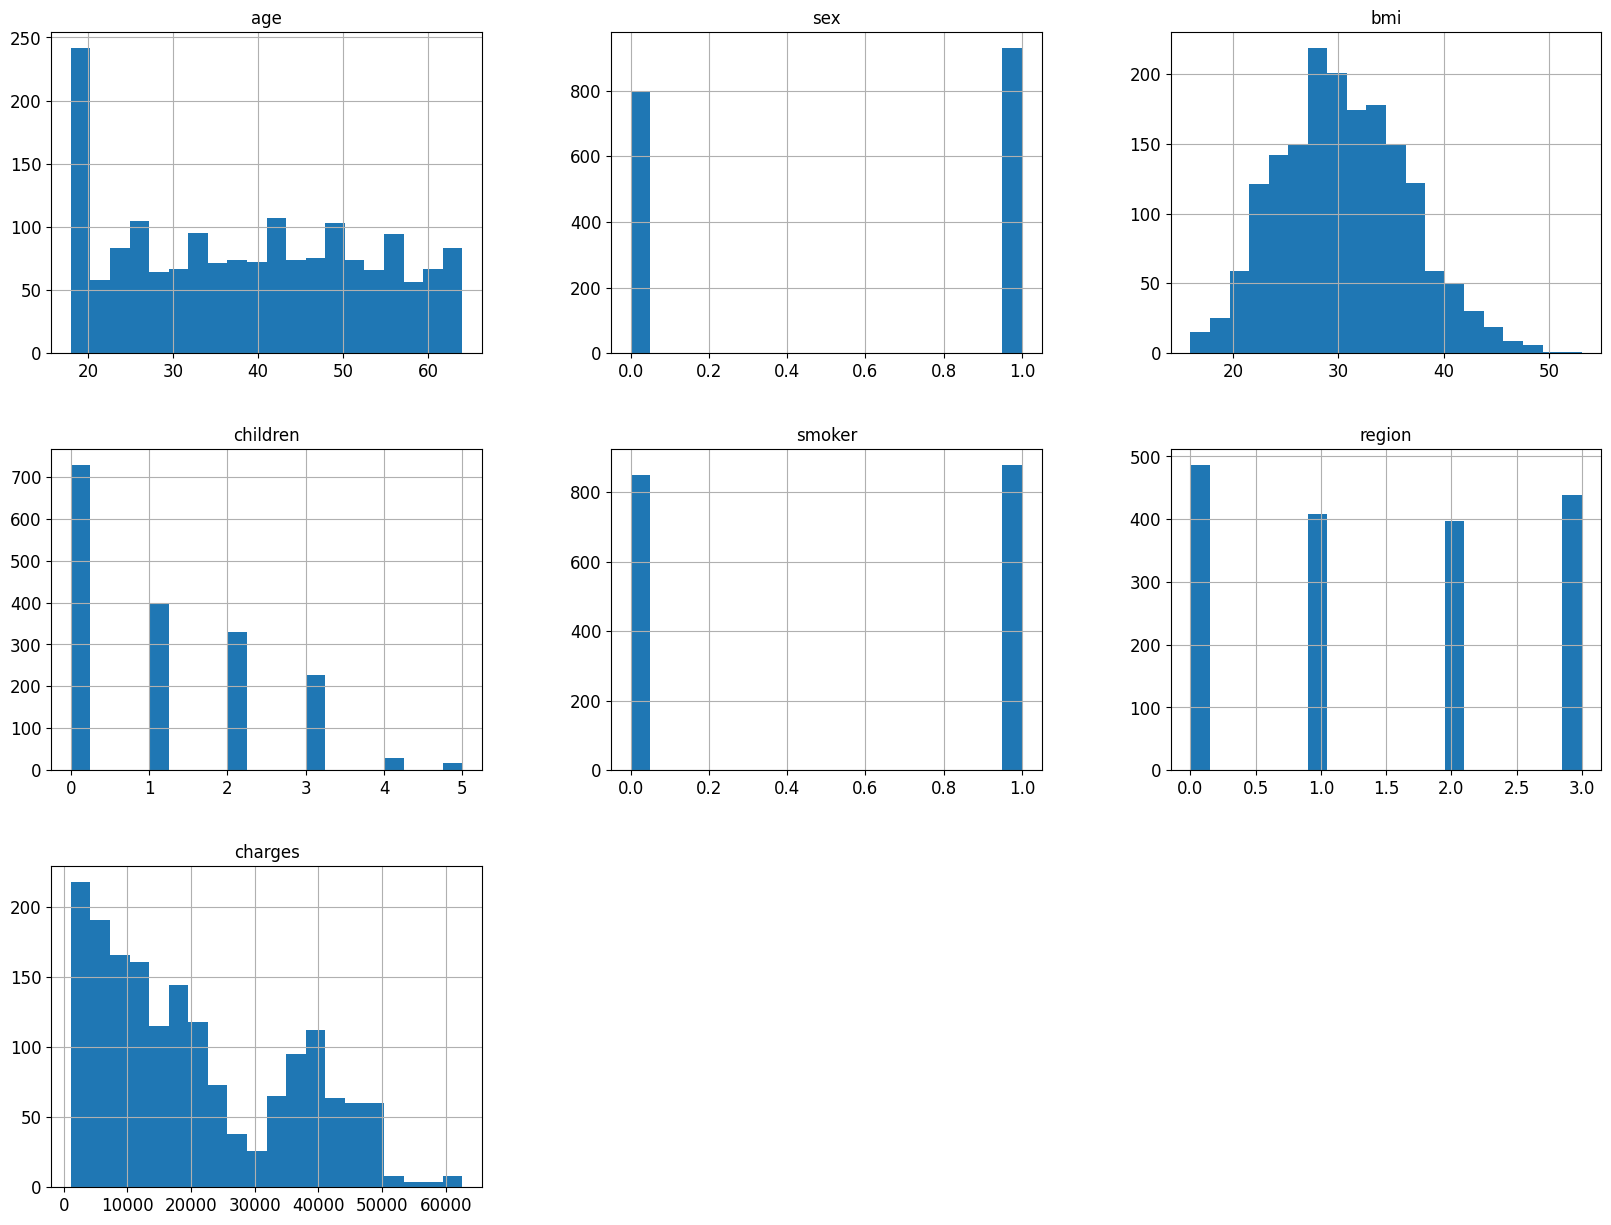

In [97]:
df_smokers.hist(bins=20, figsize=(20,15))

We see that there is now as much smokers as non-smokers but it affected the repartition of the charges. We can try to normalize it using squared method this time.

In [98]:
df_smokers_squared = df_smokers.copy()
df_smokers_squared["charges"] = np.sqrt(df_smokers["charges"])

array([[<Axes: title={'center': 'age'}>, <Axes: title={'center': 'sex'}>,
        <Axes: title={'center': 'bmi'}>],
       [<Axes: title={'center': 'children'}>,
        <Axes: title={'center': 'smoker'}>,
        <Axes: title={'center': 'region'}>],
       [<Axes: title={'center': 'charges'}>, <Axes: >, <Axes: >]],
      dtype=object)

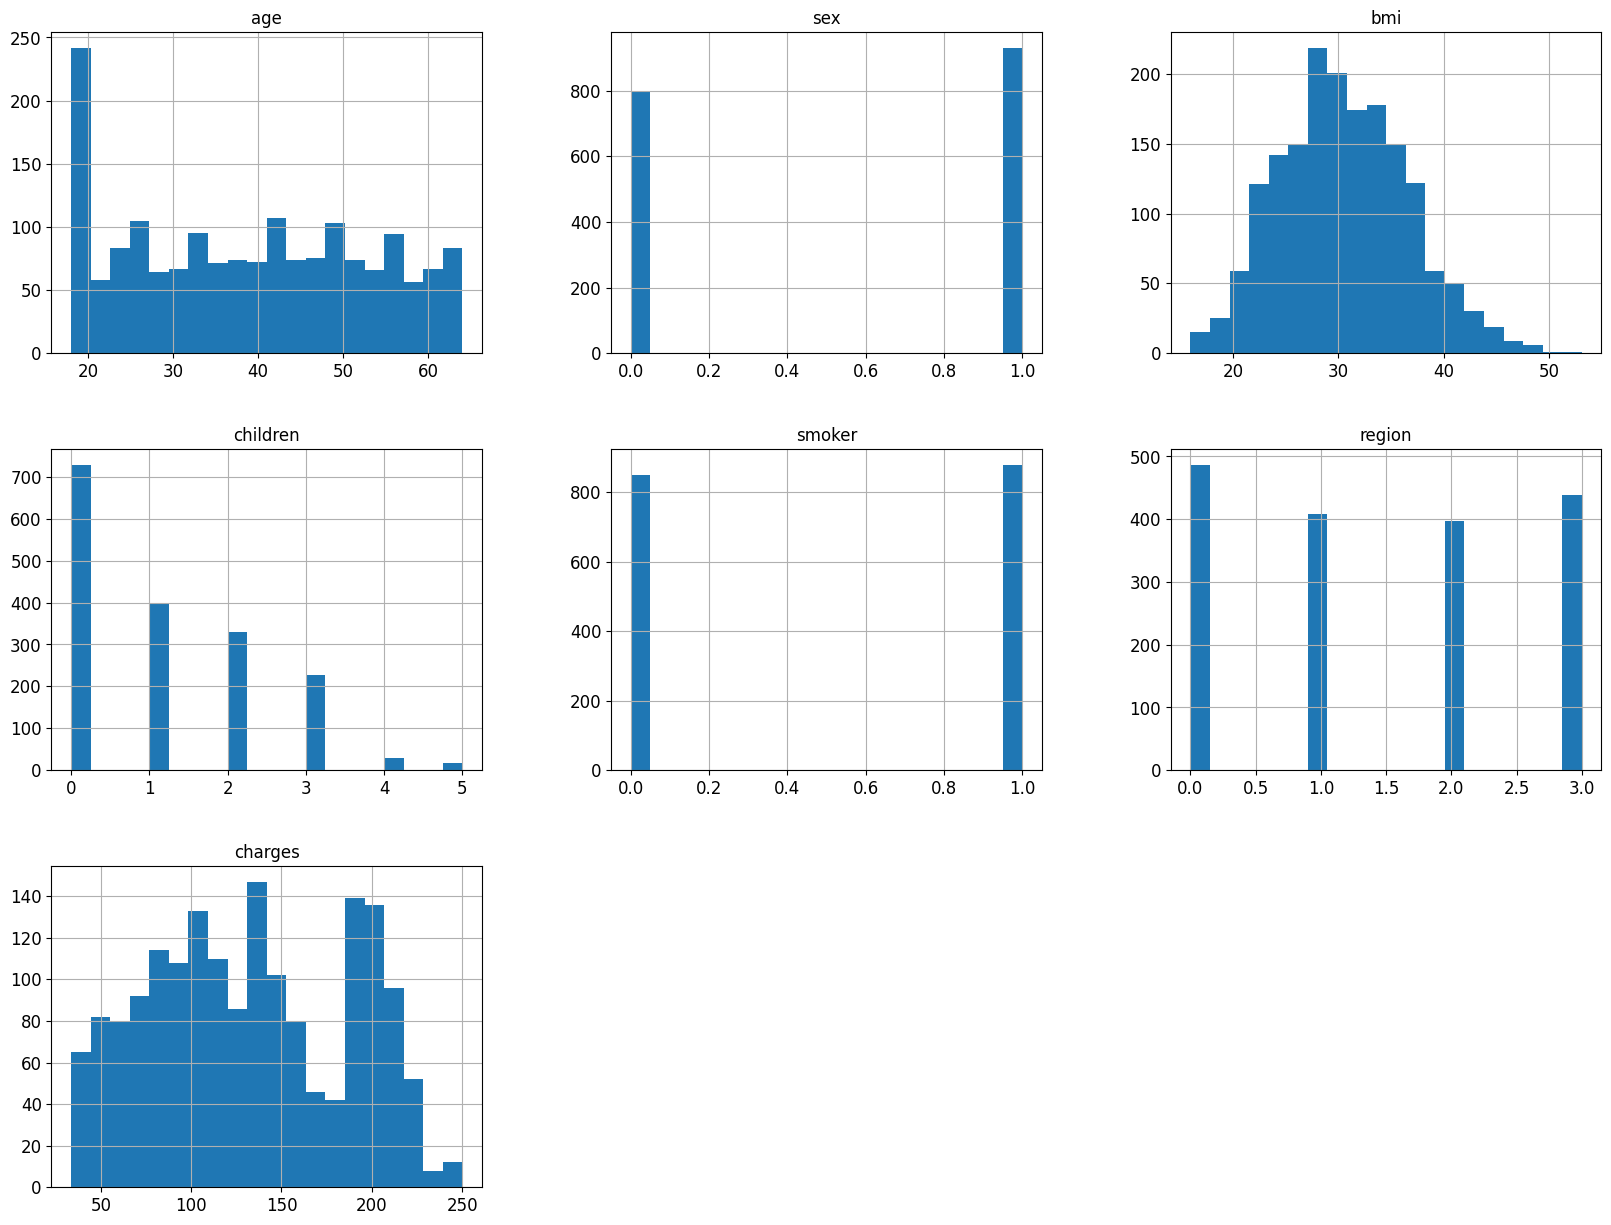

In [99]:
df_smokers_squared.hist(bins=20, figsize=(20,15))

Now we can export the data into the different sets for training.

In [100]:
df.to_csv('./data/train_original.csv', index=False)
df_log.to_csv('./data/train_log.csv', index=False)
df_smokers.to_csv('./data/train_smokers.csv', index=False)
df_smokers_squared.to_csv('./data/train_smokers_squared.csv', index=False)

Split data into training, validation and test sets. We test models using training and validation set and then only we do a final test using the test sets on all the models used.